<a href="https://colab.research.google.com/github/MorozovDesu/DataAnalysis_methods/blob/main/LAB_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.7/202.7 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 91.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 36.0 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=f808fcb78f6bdc852dd4f18fca09ecfe7a74a3712fa4d30f5fe02a402e3773d4
  Stored in directory: /root/.cache/pip/wheels/6d/32/bd/460a71becd83f7d77152f437c2fd451f5c87bc19cfcdbfcd24
Successfully built factor_analyzer


In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from factor_analyzer import FactorAnalyzer
import warnings
warnings.filterwarnings("ignore")

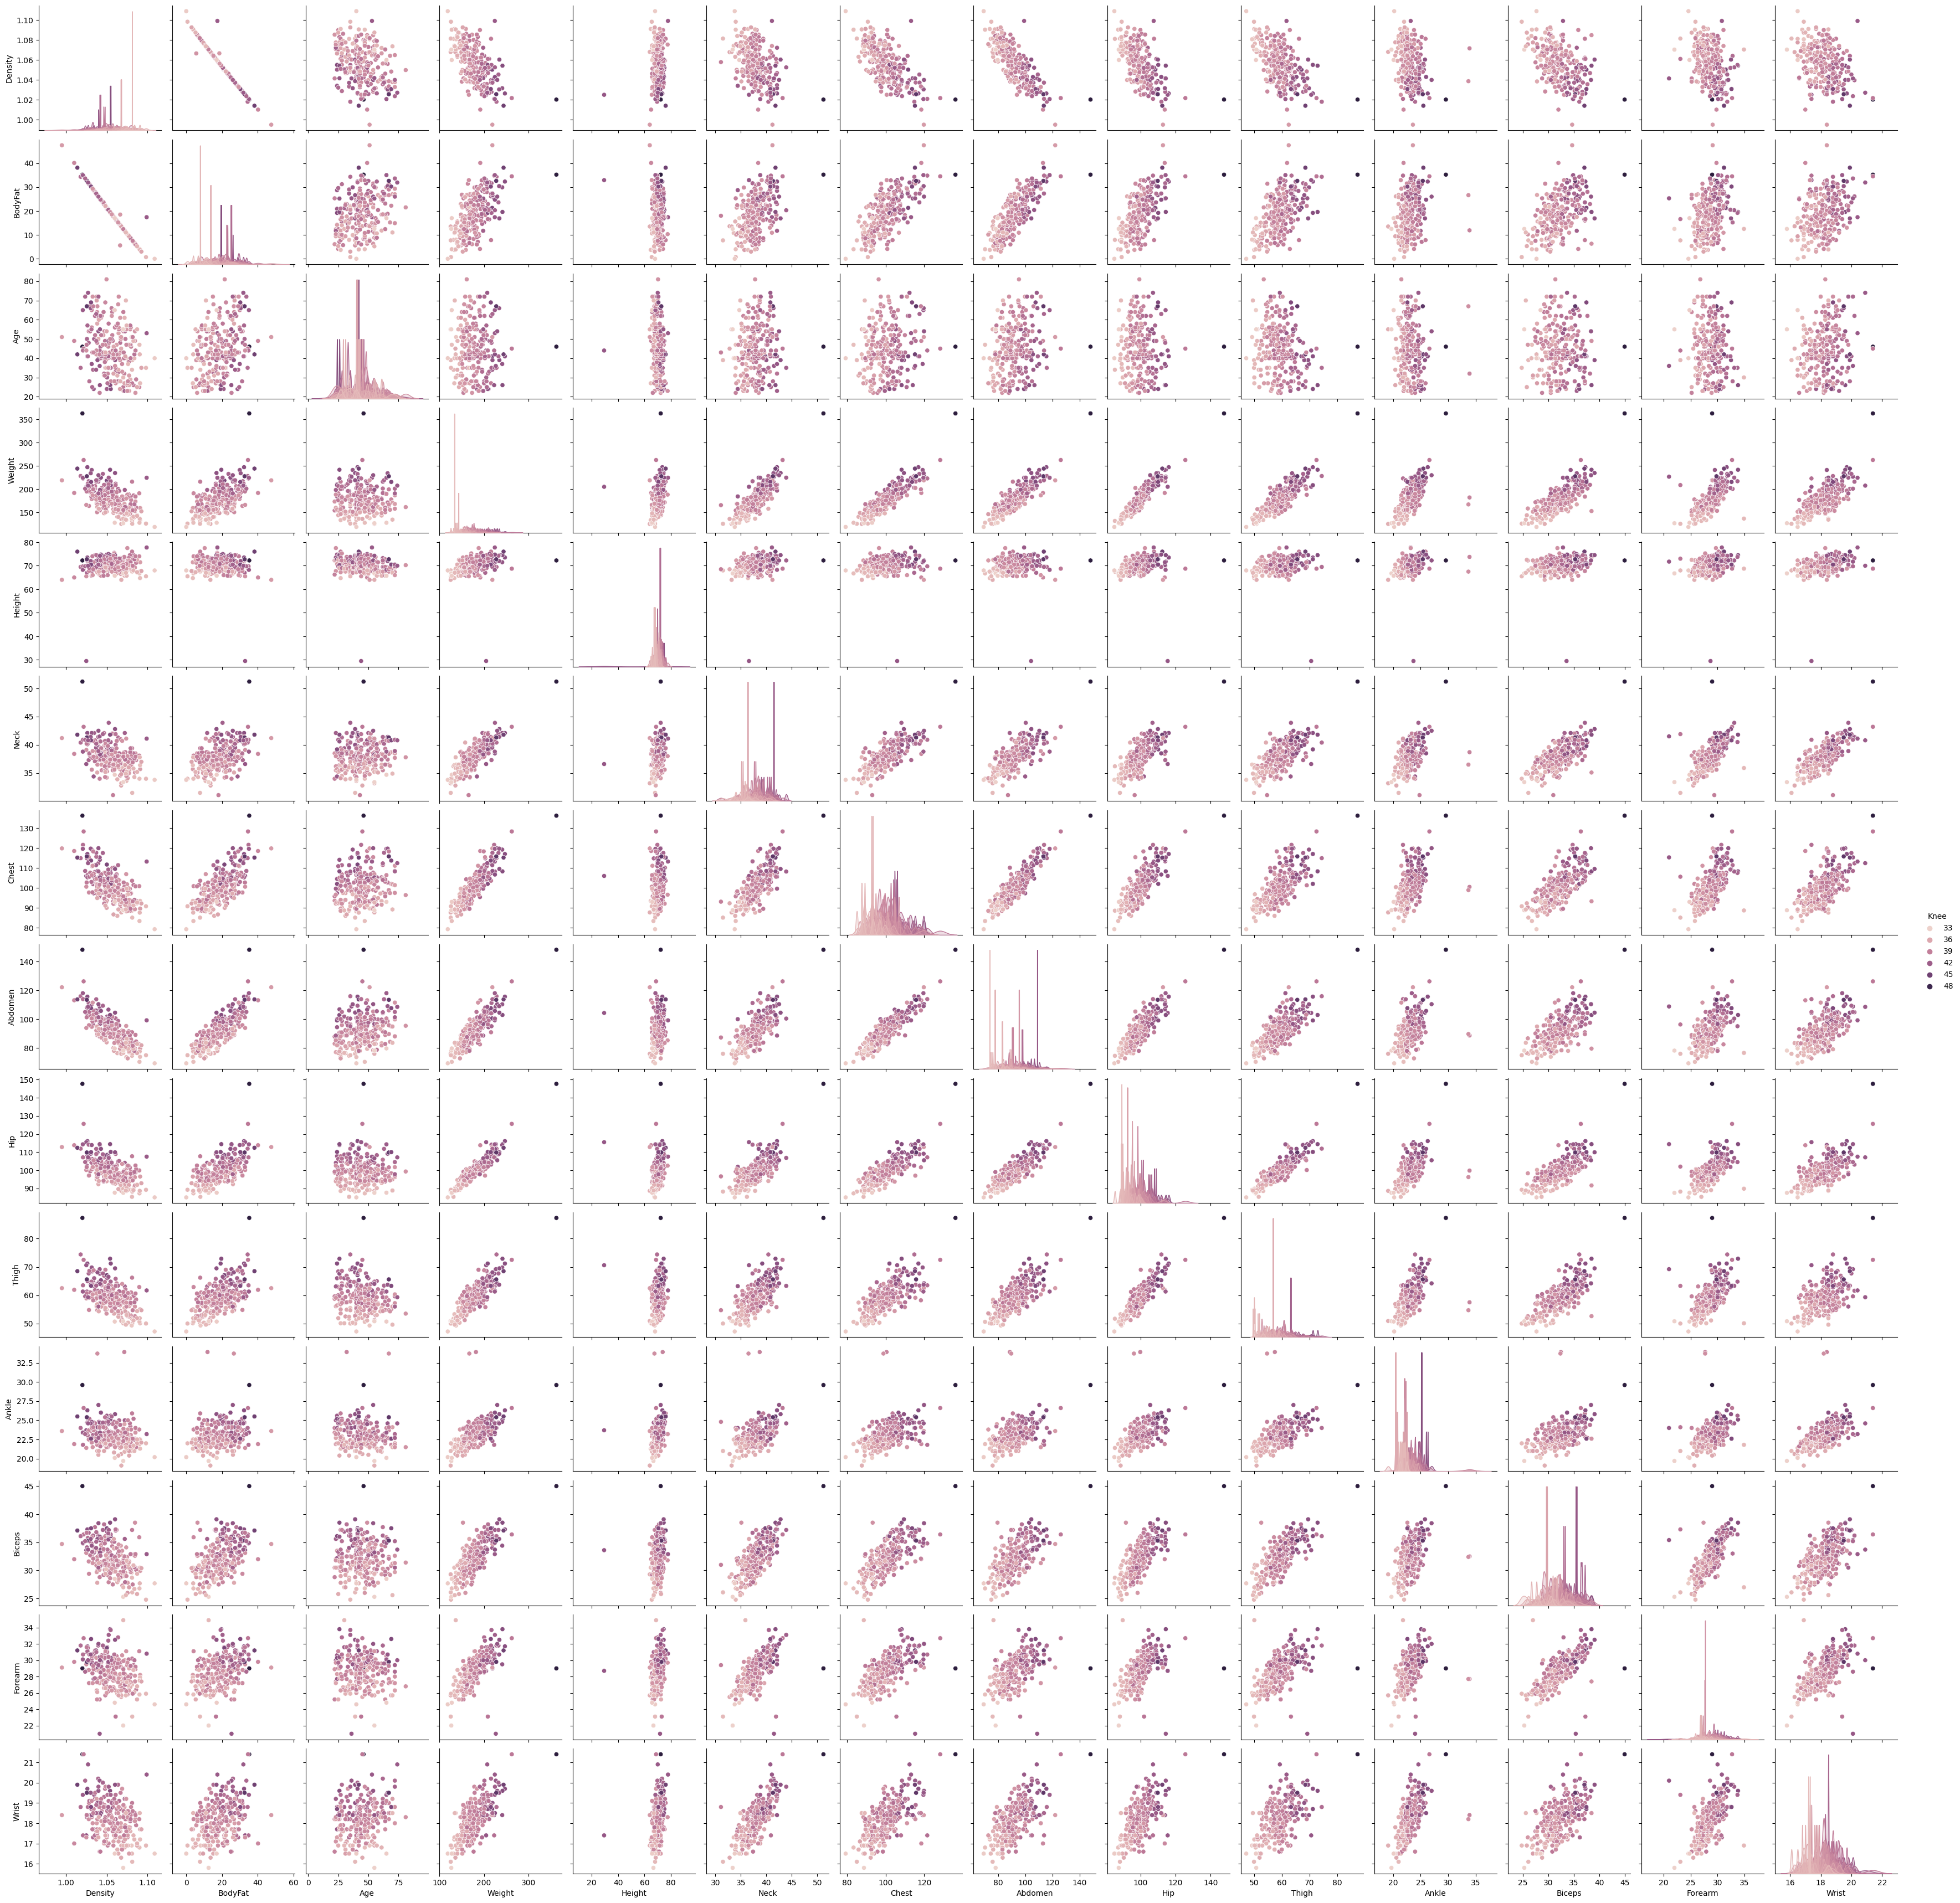

In [3]:
# задания
#в методе главных компонент обосновать выбор числа главных компонент(рассказать основную идею)
#решить задачу кластеризации на исходной выборке, сократить кол-во признаков и снова решить задачу




#Получим значения основных показателей описательной статистики и построим диаграммы рассеяния для признаков, измеренных в количественной шкале
df=pd.read_csv('drive/MyDrive/bodyfat.csv')
print(df.describe())
sns.pairplot(df,hue='Knee',diag_kws={'bw': 0.2})#hue='Knee' отвечает за цвет по значению в столбце


In [6]:
df.head()

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7

In [ ]:
#Отделим переменную отклика от набора данных и выполним его стандартизацию
#Segment=df.pop('Knee')
scaler = StandardScaler()
df_t=pd.DataFrame(scaler.fit_transform(df))
df_t.describe()

0             1             2             3             4   \
count  2.520000e+02  2.520000e+02  2.520000e+02  2.520000e+02  2.520000e+02   
mean   5.688571e-15 -1.550788e-16  2.220446e-16  2.819614e-16  1.480297e-15   
std    1.001990e+00  1.001990e+00  1.001990e+00  1.001990e+00  1.001990e+00   
min   -3.189163e+00 -2.292926e+00 -1.819583e+00 -2.060102e+00 -1.111966e+01   
25%   -7.462399e-01 -7.992934e-01 -7.263189e-01 -6.793000e-01 -5.194276e-01   
50%   -3.547554e-02  5.891481e-03 -1.498703e-01 -8.265733e-02 -4.070749e-02   
75%    7.805873e-01  7.362450e-01  7.247413e-01  6.162669e-01  5.747897e-01   
max    2.807582e+00  3.394253e+00  2.871515e+00  6.280963e+00  2.079339e+00   

                 5             6             7             8             9   \
count  2.520000e+02  2.520000e+02  2.520000e+02  2.520000e+02  2.520000e+02   
mean  -8.247371e-16 -5.639228e-17  3.313046e-16  8.379540e-16 -8.582200e-16   
std    1.001990e+00  1.001990e+00  1.001990e+00  1.001990e+00  1.001990e+00   
min   -2.840817e+00 -2.558224e+00 -2.151708e+00 -2.084632e+00 -2.329591e+00   
25%   -6.562274e-01 -7.694810e-01 -7.416097e-01 -6.160653e-01 -6.500498e-01   
50%    3.271323e-03 -1.395583e-01 -1.492291e-01 -8.458411e-02 -7.747885e-02   
75%    5.906373e-01  5.408770e-01  6.289966e-01  5.063391e-01  5.618921e-01   
max    5.444135e+00  4.204531e+00  5.161290e+00  6.684808e+00  5.323774e+00   

                 10            11            12            13  
count  2.520000e+02  2.520000e+02  2.520000e+02  2.520000e+02  
mean   7.542468e-16 -5.991680e-17 -3.002889e-15  3.348292e-16  
std    1.001990e+00  1.001990e+00  1.001990e+00  1.001990e+00  
min   -2.366135e+00 -2.478519e+00 -3.800254e+00 -2.607794e+00  
25%   -6.517075e-01 -6.876368e-01 -6.763048e-01 -6.759055e-01  
50%   -1.787621e-01 -7.409368e-02  1.790624e-02  7.538454e-02  
75%    5.306560e-01  6.803985e-01  6.625308e-01  6.120203e-01  
max    6.383355e+00  4.220708e+00  3.092269e+00  3.402526e+00

In [40]:
#Используя сумму квадратов растояний до центров оценить качество кластеризации
distortions = []
for i in range(1, 10):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=1)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
#на графике видно, что после 3 точек сумма квадратов уменьшается медленно, значит число кластеров подобрано верно

#Другой метод
kmeans = KMeans(n_clusters=N, n_init=10)
kmeans.fit(X)
clusters_inertia = kmeans.inertia_
#Чем меньше значение clusters_inertia, тем лучше кластеризация
print(f'Сумма квадратов расстояний до центров кластеров: {clusters_inertia:.2f}')

NameError: ignored

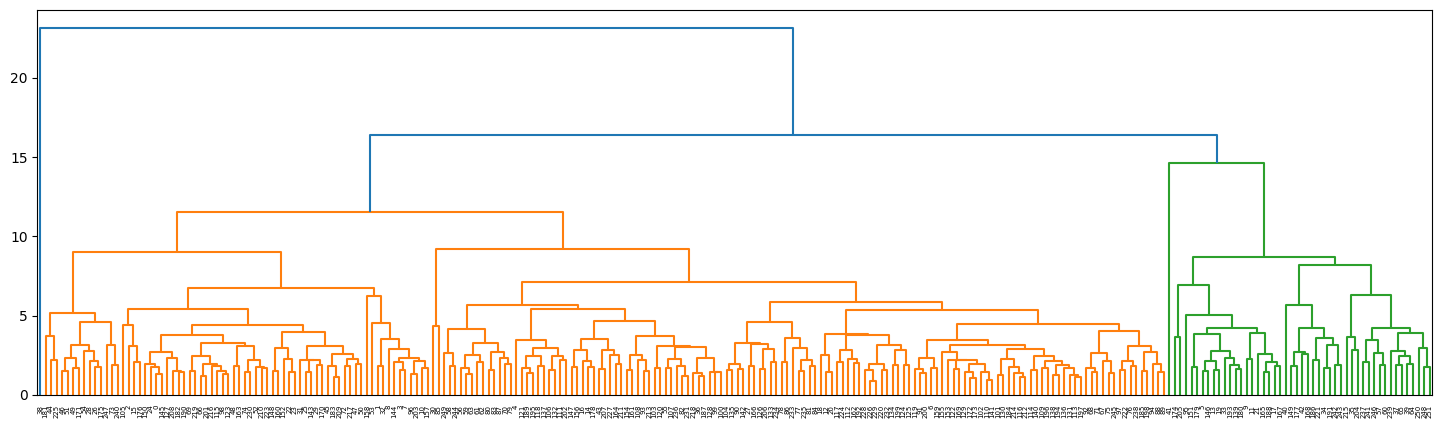

In [39]:
sc = StandardScaler()#стандартизируем данные
df_t = pd.DataFrame(sc.fit_transform(df))
#Выполним иерархическую кластеризацию
row_dist=pdist(df_t,metric='euclidean')
mergings = linkage(row_dist, method='complete')
plt.figure(figsize=(18,5))
#Построение дендрограммы
dendrogram(mergings)
plt.show()

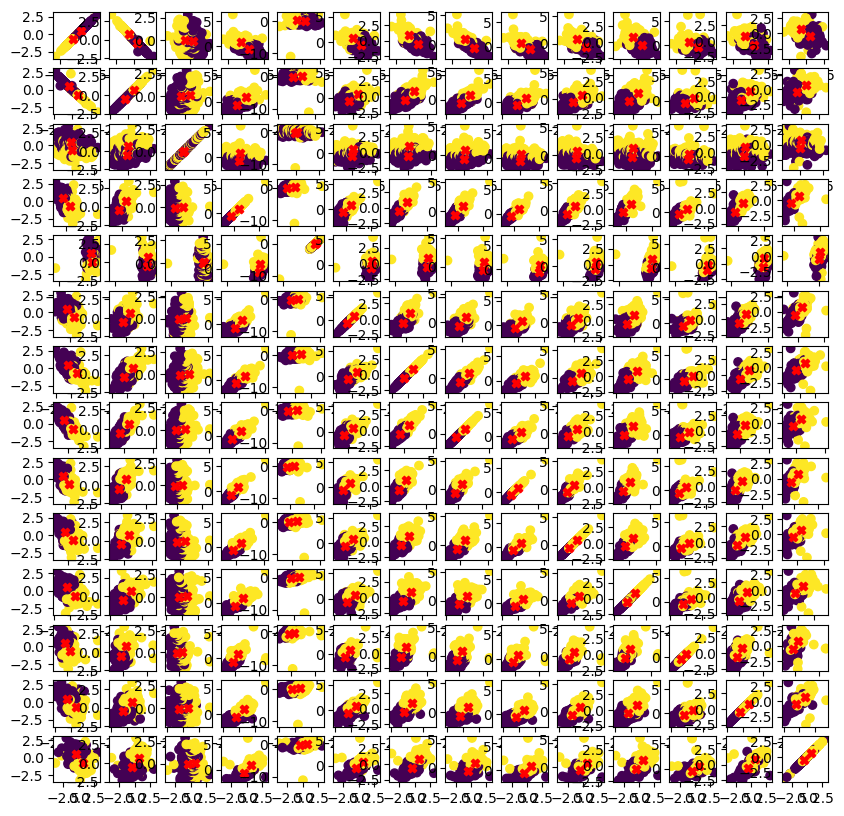

In [24]:
N = 2
D = 14
model = KMeans(n_clusters=N, max_iter=1000)
model.fit(df_t)
y=model.predict(df_t)
plt.figure(figsize=(10,10))
k=0
for i in range(D):
    for j in range (D):
        k=k+1
        sub=plt.subplot(D,D,k)
        sub.scatter(df_t[i],df_t[j],c=y)
        plt.scatter(model.cluster_centers_[:,i],model.cluster_centers_[:,j], marker='X', c='red')

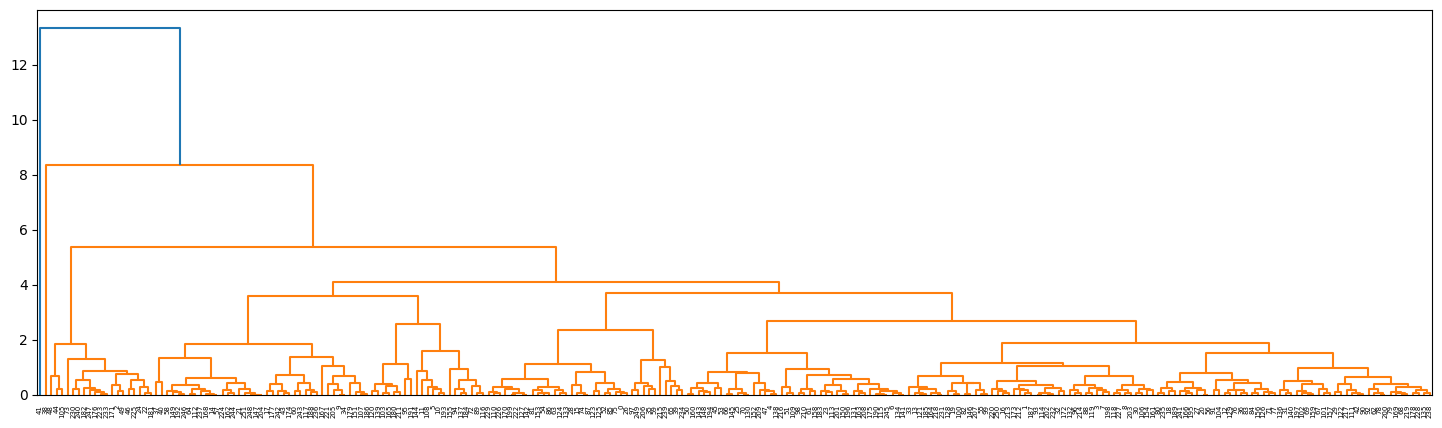

In [33]:
#Метод выбора признаков на основе важности
#позволяет выбирать наиболее значимые признаки, которые оказывают наибольшее влияние на кластеризацию.
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
select_features = SelectFromModel(LogisticRegression(penalty="l1",solver="liblinear"), max_features=2)#solver="saga"
X_new = select_features.fit_transform(df, y)
df_n = pd.DataFrame(sc.fit_transform(X_new))
#Выполним иерархическую кластеризацию
row_dist=pdist(df_n,metric='euclidean')
mergings = linkage(row_dist, method='complete')
plt.figure(figsize=(18,5))
#Построение дендрограммы
dendrogram(mergings)
plt.show()

          Density   BodyFat       Age    Weight    Height      Neck     Chest  \
Density  1.000000 -0.987782 -0.277637 -0.594062  0.097881 -0.472966 -0.682599   
BodyFat -0.987782  1.000000  0.291458  0.612414 -0.089495  0.490592  0.702620   
Age     -0.277637  0.291458  1.000000 -0.012746 -0.171645  0.113505  0.176450   
Weight  -0.594062  0.612414 -0.012746  1.000000  0.308279  0.830716  0.894191   
Height   0.097881 -0.089495 -0.171645  0.308279  1.000000  0.253710  0.134892   
Neck    -0.472966  0.490592  0.113505  0.830716  0.253710  1.000000  0.784835   
Chest   -0.682599  0.702620  0.176450  0.894191  0.134892  0.784835  1.000000   
Abdomen -0.798955  0.813432  0.230409  0.887995  0.087813  0.754077  0.915828   
Hip     -0.609331  0.625201 -0.050332  0.940884  0.170394  0.734958  0.829420   
Thigh   -0.553091  0.559608 -0.200096  0.868694  0.148436  0.695697  0.729859   
Ankle   -0.264890  0.265970 -0.105058  0.613685  0.264744  0.477892  0.482988   
Biceps  -0.487109  0.493271 

<Axes: >

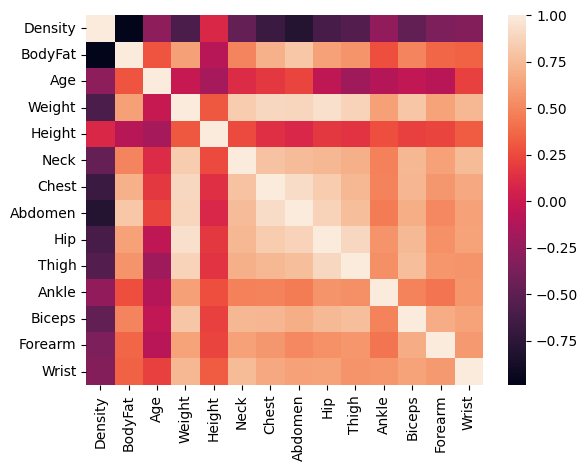

In [ ]:
#Построим корреляционную матрицу и график «тепловая карта»
print(df.corr())
sns.heatmap(df.corr())

[0.58606843 0.1341946  0.07664624 0.04965994 0.04497059 0.03551716
 0.0187756  0.01559769 0.01542792 0.0120097  0.00550897 0.00305482
 0.00175514]


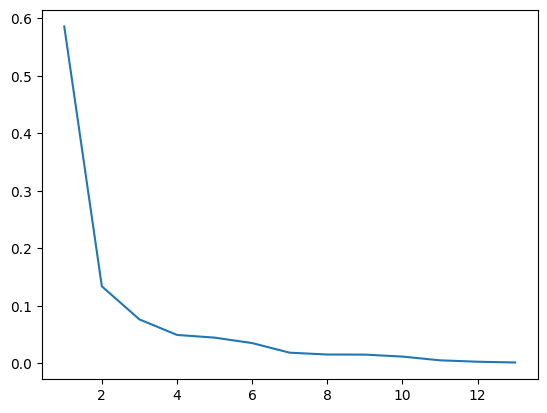

In [ ]:
#Определим, какую часть общей дисперсии описывают главные компоненты
pca = PCA(n_components=13)
pc=pca.fit_transform(df_t)
v = pca.explained_variance_ratio_
print(v)
plt.plot(range(1,df_t.shape[1]),v) #(1, df_t.shape[1]+1) вместо (0, df_t.shape[1])

[0.58606843 0.1341946 ]


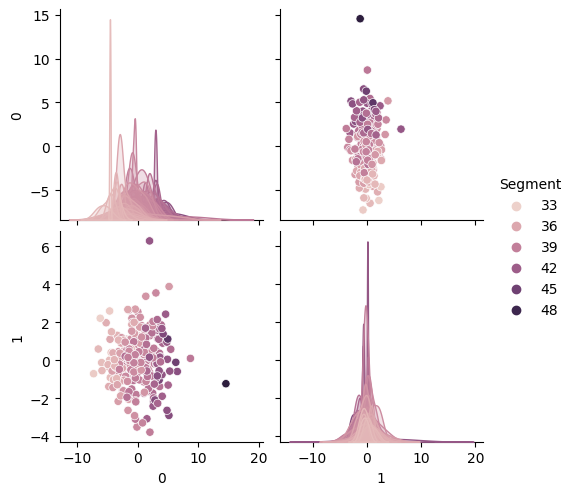

In [ ]:
#построим диаграммы рассеяния для новой системы координат
pca = PCA(n_components=2)
pc=pca.fit_transform(df_t)
pc=pd.DataFrame(pc)
pc['Segment']=Segment
sns.pairplot(pc,hue='Segment')
v = pca.explained_variance_ratio_
print(v)


In [ ]:
#Выполним факторный анализ для пяти факторов без вращения, выведем матрицу нагрузок и матрицу общностей
fa=FactorAnalyzer(n_factors=5,rotation=None) 
scaler = StandardScaler()
aps_reduced=scaler.fit_transform(df_t)
fa.fit(aps_reduced)
loads=fa.loadings_
print(loads)
print(fa.get_communalities())
print(fa.get_uniquenesses())


[[-7.27290972e-01  6.19149576e-01  1.98542915e-01  1.42582555e-01
   1.51558312e-01]
 [ 7.40351202e-01 -6.09906590e-01 -1.72392919e-01 -1.21571248e-01
  -1.30307950e-01]
 [ 8.63615941e-02 -5.81138479e-01  6.25889562e-01  7.49564159e-02
   7.73057455e-02]
 [ 9.71731329e-01  1.66149409e-01 -1.88901753e-02  1.37945986e-01
  -4.64602487e-02]
 [ 2.00497917e-01  4.03890891e-01  1.29125401e-01 -7.82878066e-03
  -2.12169501e-01]
 [ 8.38762558e-01  1.44292066e-01  2.04585654e-01 -4.02858787e-02
   9.73283691e-02]
 [ 9.13505199e-01 -9.46423918e-02  6.90405932e-02  5.53573225e-02
   9.10610429e-02]
 [ 9.33514740e-01 -2.44199197e-01  6.41122536e-04  1.58464191e-01
   5.62939961e-02]
 [ 9.21837826e-01  8.59824918e-02 -1.70275693e-01  2.29249585e-01
   4.97263754e-02]
 [ 8.60532198e-01  1.76909306e-01 -2.93537485e-01  7.68781066e-02
   8.95061954e-02]
 [ 5.75044078e-01  2.83780489e-01  3.12470107e-02  5.83977759e-02
  -2.23692533e-01]
 [ 8.20799637e-01  1.92933677e-01 -1.53018510e-02 -1.90344905e-01

In [ ]:
#Выполним факторный анализ с вращением varimax для пяти факторов, выведем матрицу нагрузок и матрицу общностей
fa=FactorAnalyzer(n_factors=5,rotation='varimax') 
fa.fit(df_t)
loads=fa.loadings_
print(loads)
print(fa.get_communalities())
print(fa.get_uniquenesses())


[[-0.34761891 -0.91065722  0.03370568 -0.15448743 -0.14099443]
 [ 0.37362014  0.88809816 -0.02867486  0.15812168  0.16568018]
 [-0.02620985  0.18451743 -0.08809837 -0.02811011  0.83977825]
 [ 0.77280977  0.33065196  0.45958901  0.27472724 -0.01221106]
 [ 0.08009436 -0.1205169   0.4732133   0.10013715 -0.10089663]
 [ 0.59622273  0.20008729  0.38278313  0.45266829  0.17420077]
 [ 0.69649979  0.41228519  0.24135396  0.33084267  0.19176143]
 [ 0.74992077  0.52986549  0.17122245  0.20015401  0.21643935]
 [ 0.83997927  0.34128773  0.2798643   0.18566306 -0.07976567]
 [ 0.7553835   0.31182744  0.22928626  0.29958987 -0.24845836]
 [ 0.3824762   0.1503952   0.51725859  0.14430662 -0.091348  ]
 [ 0.56143492  0.23950469  0.27743361  0.56519654 -0.05027994]
 [ 0.30995875  0.18487962  0.33665615  0.63956046 -0.06825628]
 [ 0.42305672  0.11168518  0.65010806  0.36244919  0.30662389]]
[0.99501736 0.98158499 0.74851266 0.99341189 0.26507783 0.77729388
 0.85957208 0.95936334 0.94119986 0.87189842 0.465